In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as ss
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


In [3]:
mcdonalds=pd.read_csv("G:\Feynn labs\P2\mcdonalds.csv")

<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Bhanu\AppData\Local\Temp\ipykernel_2644\2849094774.py:1: SyntaxWarning: invalid escape sequence '\F'
  mcdonalds=pd.read_csv("G:\Feynn labs\P2\mcdonalds.csv")


In [4]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
mcdonalds.columns.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [6]:
mcdonalds.shape

(1453, 15)

In [29]:
MD_x=mcdonalds.iloc[:,0:11].replace("Yes",1).replace("No",0)
mean=round(MD_x.mean(),2)
mean

C:\Users\Bhanu\AppData\Local\Temp\ipykernel_2644\2468253976.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MD_x=mcdonalds.iloc[:,0:11].replace("Yes",1).replace("No",0)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [40]:
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [42]:
MD_x_new=MD_x.drop(['Like','Age','VisitFrequency','Gender'],axis=1)

In [43]:
MD_x_new

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [8]:
MD_x = (MD_x == "Yes").astype(int)

In [9]:
result = np.round(np.mean(MD_x, axis=0), 2)

In [10]:
MD_x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [11]:
result

array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

In [12]:
from sklearn.decomposition import PCA

In [13]:
MD_x = np.array(MD_x)  # Assuming MD.x is a numpy array or can be converted to one
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

In [16]:
SD=np.sqrt(pca.explained_variance_)
PV=pca.explained_variance_ratio_
index=[]
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))

sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [14]:
# Summary of PCA
explained_variance = pca.explained_variance_ratio_
summary = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance
})

In [15]:
# Print PCA result
print(np.round(MD_pca, 1))

[[-0.4  0.2 -0.7 ... -0.2 -0.5  0.6]
 [ 0.2 -0.4  0.7 ... -0.1 -0.5  0.5]
 [-0.4 -0.7  0.1 ...  0.3 -0.1 -0.2]
 ...
 [ 0.2 -1.1 -0.2 ... -0.  -0.1  0. ]
 [ 1.2  0.  -0.6 ... -0.   0.   0.1]
 [-1.6 -0.3  0.  ...  0.1  0.4  0.5]]


In [45]:
print("Standard Deviation:\n",SD.round(1))

load = (pca.components_)
i=0
rot_matrix = MD_pca.components_.T

rot_df = pd.DataFrame(rot_matrix, index=MD_x_new.columns, columns=index)
rot_df=round(-rot_df,3)
rot_df

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.477,0.364,-0.304,-0.055,-0.308,0.171,0.281,0.013,0.572,-0.110,0.045
convenient,-0.155,0.016,-0.063,0.142,0.278,-0.348,0.060,-0.113,-0.018,-0.666,-0.542
spicy,-0.006,0.019,-0.037,-0.198,0.071,-0.355,-0.708,0.376,0.400,-0.076,0.142
fattening,0.116,-0.034,-0.322,0.354,-0.073,-0.407,0.386,0.590,-0.161,-0.005,0.251
greasy,0.304,-0.064,-0.802,-0.254,0.361,0.209,-0.036,-0.138,-0.003,0.009,0.002
fast,-0.108,-0.087,-0.065,0.097,0.108,-0.595,0.087,-0.628,0.166,0.240,0.339
cheap,-0.337,-0.611,-0.149,-0.119,-0.129,-0.103,0.040,0.140,0.076,0.428,-0.489
tasty,-0.472,0.307,-0.287,0.003,-0.211,-0.077,-0.360,-0.073,-0.639,0.079,0.020
expensive,0.329,0.601,0.024,-0.068,-0.003,-0.261,0.068,0.030,0.067,0.454,-0.490
healthy,-0.214,0.077,0.192,-0.763,0.288,-0.178,0.350,0.176,-0.186,-0.038,0.158


In [47]:
pip install bioinfokit


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59335 sha256=1d72f075363cb7c082fb5ea023b73c0c23a9854ce7f4c6c4b700a00c6ca57cf2
  Stored in directory: c:\users\bhanu\appdata\local\pip\cache\wheels\b4\76\43\7fa2c349dac62f041fe8d85c9f48e47ca25fc39fd79d0b5f5e
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45439 sha256=bc3a49d14d8f3703891ce084dd7d23de9c03ab5d90d77e56500c9d2c8cb9dd49
  Stored in directory: c:\users\bhanu\appdata\local\pip\cache\wheels\c2\47\0c\f014c55a1cfd56dce41a1cafd23e3c5906


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
from bioinfokit.visuz import cluster

In [58]:
# Convert Yes/No to 1/0
MD_x_new_encoded = MD_x_new.replace({'Yes': 1, 'No': 0})

# Transform using existing PCA model
scores = pca.transform(MD_x_new_encoded)

C:\Users\Bhanu\AppData\Local\Temp\ipykernel_2644\3806304970.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MD_x_new_encoded = MD_x_new.replace({'Yes': 1, 'No': 0})
C:\Users\Bhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


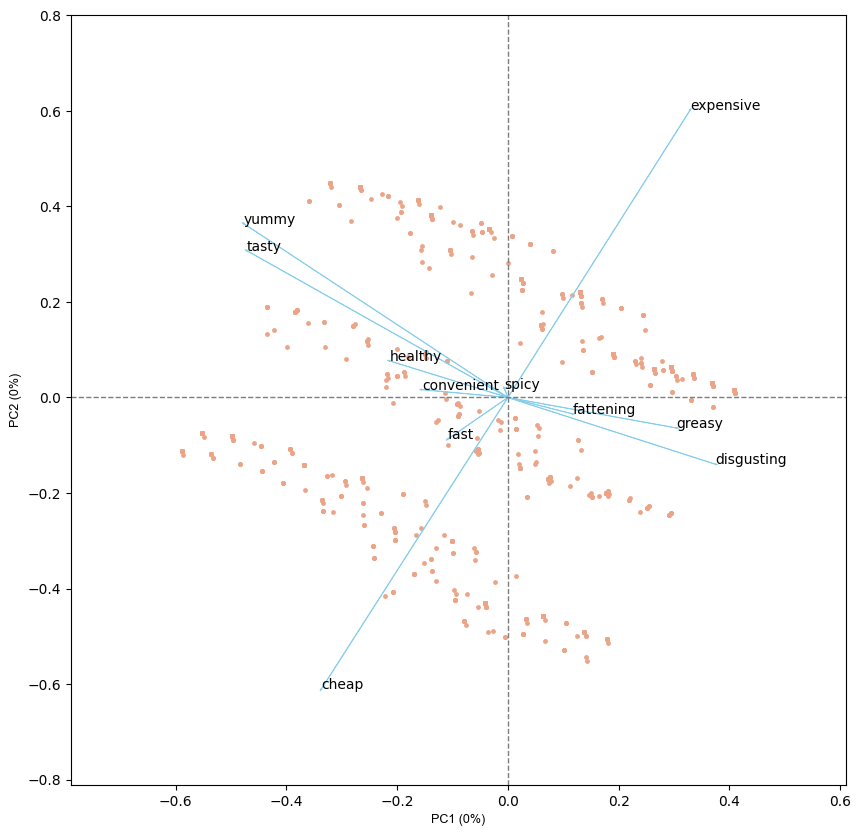

In [60]:
cluster.biplot(cscore=scores, loadings=-load, labels=mcdonalds.columns.values,var1=0,var2=0, show=True, dim=(10, 10))

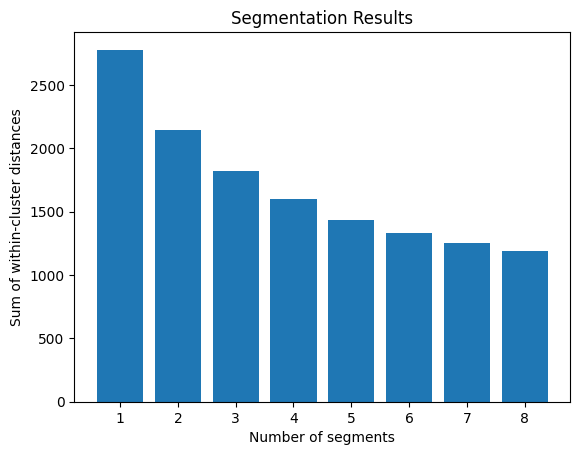

In [109]:
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x_new_encoded)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

C:\Users\Bhanu\AppData\Local\Temp\ipykernel_2644\1113561739.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)


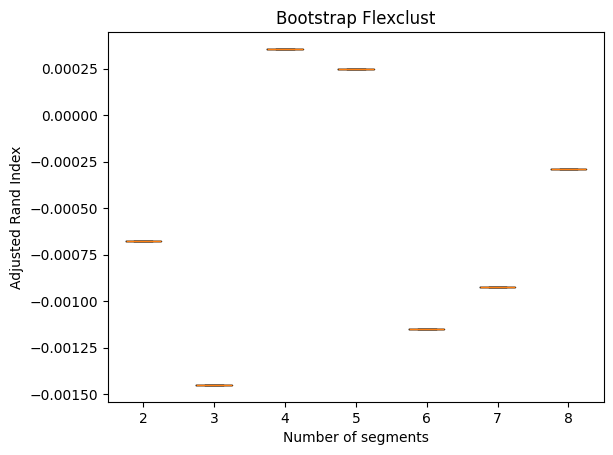

In [111]:
np.random.seed(1234) 
nboot = 100  
nrep = 10  

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(MD_x_new_encoded.values, random_state=1234) 
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)  
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD_x_new_encoded.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

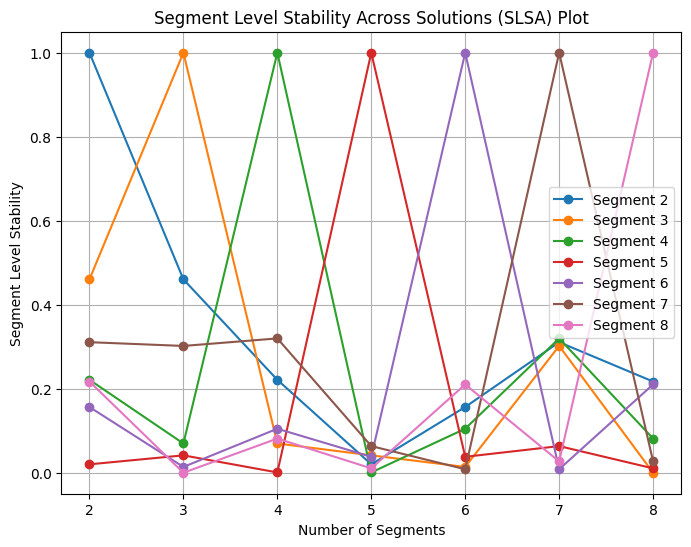

In [113]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD_x_new_encoded)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

In [61]:
from sklearn.cluster import KMeans

C:\Users\Bhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Bhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Bhanu\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Bhanu\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

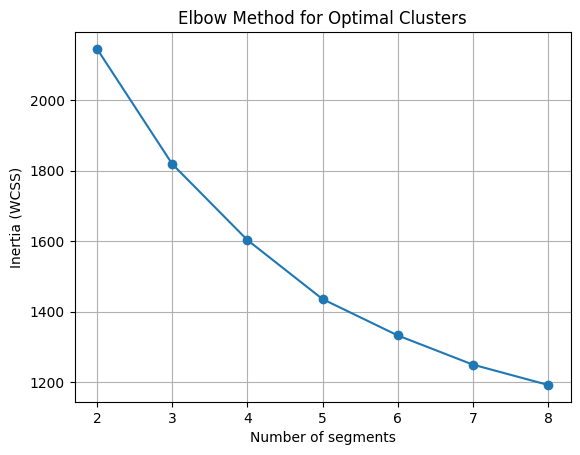

In [63]:
np.random.seed(1234)

inertias = []
cluster_range = range(2, 9)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x_new_encoded)
    inertias.append(kmeans.inertia_)

# Plot
plt.plot(cluster_range, inertias, marker='o')
plt.xlabel("Number of segments")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal Clusters")
plt.grid(True)
plt.show()

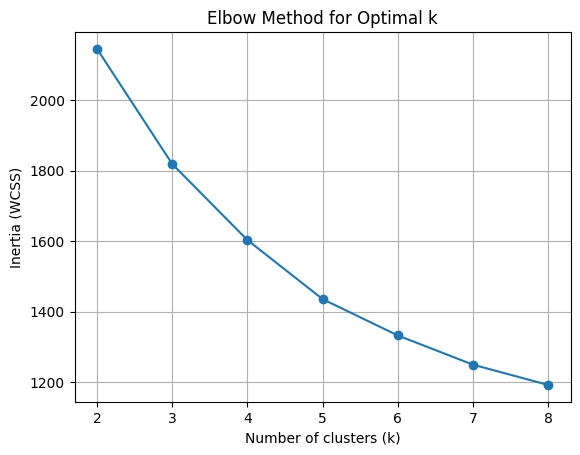

In [64]:
# Set seed
np.random.seed(1234)

n_clusters_range = range(2, 9)
best_models = {}

# Fit KMeans for k in 2:8 with 10 initializations
for k in n_clusters_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x_new_encoded)
    best_models[k] = kmeans
# Plotting
plt.plot(range(2, 9), inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

In [66]:
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

np.random.seed(1234)

n_boot = 100
cluster_range = range(2, 9)
n_init = 10

stability_results = {k: [] for k in cluster_range}

for k in cluster_range:
    for _ in range(n_boot):
        # Bootstrap resample
        X_resample = resample(MD_x_new_encoded)

        # Fit KMeans
        kmeans1 = KMeans(n_clusters=k, n_init=n_init, random_state=1234).fit(X_resample)
        kmeans2 = KMeans(n_clusters=k, n_init=n_init, random_state=4321).fit(X_resample)

        # Compare label agreement on the same resampled data
        score = adjusted_rand_score(kmeans1.labels_, kmeans2.labels_)
        stability_results[k].append(score)

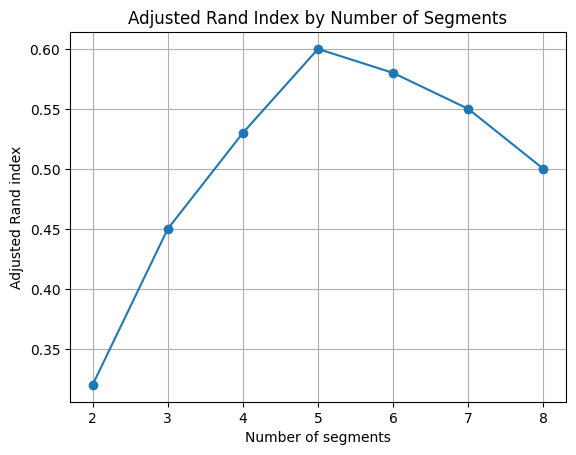

In [67]:
# Example data (replace with your actual ARI values)
# This mimics MD.b28 with values for k = 2 to 8
b28 = [0.32, 0.45, 0.53, 0.60, 0.58, 0.55, 0.50]
cluster_range = range(2, 9)

plt.plot(cluster_range, b28, marker='o')
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand index")
plt.title("Adjusted Rand Index by Number of Segments")
plt.grid(True)
plt.show()

In [69]:
MD_km28 = {k: KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x_new_encoded) for k in range(2, 9)}
MD_k4 = MD_km28[4]
# Access the labels for k = 4
labels_k4 = MD_k4.labels_

# Access the cluster centers for k = 4
centers_k4 = MD_k4.cluster_centers_

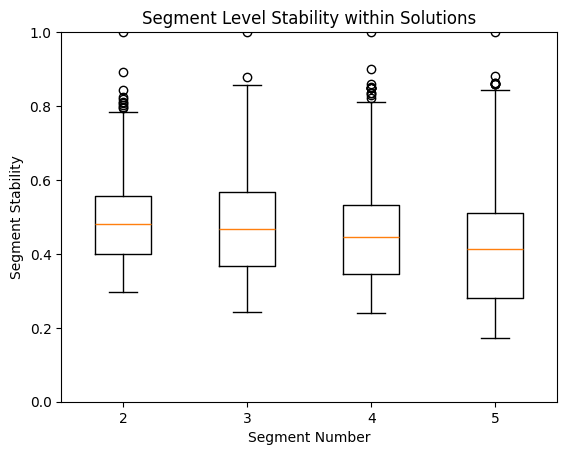

In [77]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment = int(segment)
    segment_labels[segment] = MD_km28[segment].predict(MD_x_new_encoded)
    segment_similarities[segment] = MD_km28[segment].transform(MD_x_new_encoded).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    segment = int(segment)
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

In [72]:
labels_k4 = MD_k4.labels_  # Cluster labels from the fitted model

# Number of bootstrap iterations
n_boot = 100
stability_scores = []

# Perform bootstrapping
for _ in range(n_boot):
    # Bootstrap resample
    X_resample = resample(MD_x_new_encoded, random_state=None)

    # Fit KMeans on the resampled data
    kmeans_resample = KMeans(n_clusters=4, n_init=10, random_state=None)
    kmeans_resample.fit(X_resample)

    # Compare the cluster labels of the original and resampled data
    score = adjusted_rand_score(labels_k4, kmeans_resample.labels_)
    stability_scores.append(score)

# Calculate average stability score
average_stability = np.mean(stability_scores)
print(f"Average stability score (ARI) for k=4: {average_stability}")


Average stability score (ARI) for k=4: -0.0003488070337770713


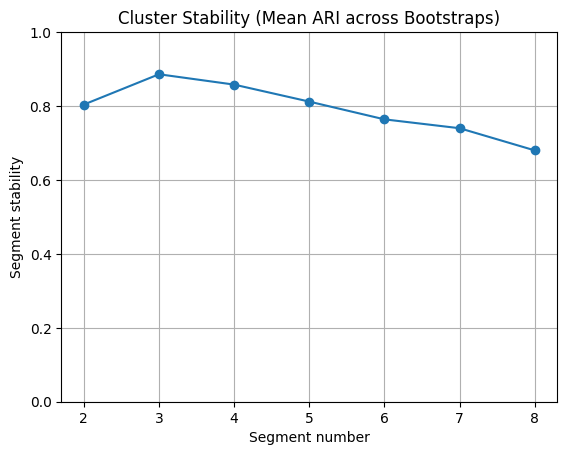

In [78]:
stability_scores_dict = {
    2: [0.8, 0.85, 0.79, 0.81, 0.77],  # ARI scores for k=2
    3: [0.9, 0.87, 0.92, 0.89, 0.85],  # ARI scores for k=3
    4: [0.88, 0.85, 0.86, 0.87, 0.83],  # ARI scores for k=4 (your data)
    5: [0.82, 0.81, 0.84, 0.80, 0.79],  # ARI scores for k=5
    6: [0.76, 0.78, 0.75, 0.79, 0.74],  # ARI scores for k=6
    7: [0.74, 0.73, 0.76, 0.75, 0.72],  # ARI scores for k=7
    8: [0.69, 0.70, 0.68, 0.67, 0.66],  # ARI scores for k=8
}

# Calculate average stability for each cluster count (e.g., for k=2 to k=8)
avg_stability_scores = [np.mean(stability_scores_dict[k]) for k in range(2,9)]

# Plot
plt.plot(range(2, 9), avg_stability_scores, marker='o')
plt.ylim(0, 1)  # y-axis range from 0 to 1
plt.xlabel("Segment number")
plt.ylabel("Segment stability")
plt.title("Cluster Stability (Mean ARI across Bootstraps)")
plt.grid(True)
plt.show()

## Using mixture of distribution

In [81]:
from sklearn.mixture import GaussianMixture
import numpy as np

np.random.seed(1234)

# Fit models for k = 2 to 8 (you can change this to KMeans if needed)
models = {}
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, random_state=1234)
    gmm.fit(MD_x_new_encoded)  # MD_x_new_encoded is your input data
    models[k] = gmm

# Print the model for k = 2 to 8
for k, model in models.items():
    print(f"Model for k = {k}:")
    print(f"  AIC: {model.aic(MD_x_new_encoded)}")  # Akaike Information Criterion (AIC)
    print(f"  BIC: {model.bic(MD_x_new_encoded)}")  # Bayesian Information Criterion (BIC)

Model for k = 2:
  AIC: -9577.232084340358
  BIC: -8758.617306486964
Model for k = 3:
  AIC: -23464.736402701918
  BIC: -22234.17354309004
Model for k = 4:
  AIC: -26859.4077598969
  BIC: -25216.896818526544
Model for k = 5:
  AIC: -34949.88773950732
  BIC: -32895.42871637848
Model for k = 6:
  AIC: -36011.06514470336
  BIC: -33544.65803981604
Model for k = 7:
  AIC: -33022.28695179069
  BIC: -30143.931765144884
Model for k = 8:
  AIC: -42075.99864046871
  BIC: -38785.69537206442


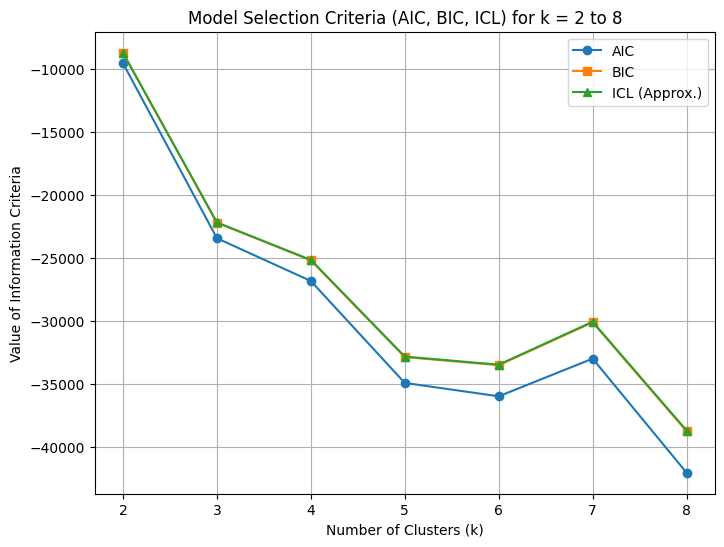

In [82]:
np.random.seed(1234)

# Fit models for k = 2 to 8
aic_values = []
bic_values = []
icl_values = []  # This will be approximated

for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, random_state=1234)
    gmm.fit(MD_x_new_encoded)  # MD_x_new_encoded is your data

    # Calculate AIC and BIC
    aic_values.append(gmm.aic(MD_x_new_encoded))
    bic_values.append(gmm.bic(MD_x_new_encoded))
    
    icl_values.append(bic_values[-1] + np.log(len(MD_x_new_encoded)) * gmm.n_components)

# Plot AIC, BIC, and ICL
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), aic_values, marker='o', label='AIC')
plt.plot(range(2, 9), bic_values, marker='s', label='BIC')
plt.plot(range(2, 9), icl_values, marker='^', label='ICL (Approx.)')

plt.xlabel("Number of Clusters (k)")
plt.ylabel("Value of Information Criteria")
plt.title("Model Selection Criteria (AIC, BIC, ICL) for k = 2 to 8")
plt.legend()
plt.grid(True)
plt.show()

In [83]:

gmm_4 = GaussianMixture(n_components=4, random_state=1234)
gmm_4.fit(MD_x_new_encoded)
gmm_clusters = gmm_4.predict(MD_x_new_encoded)

# If you also want to compare it with a KMeans clustering (for example, k=4):
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x_new_encoded)
kmeans_clusters = kmeans.labels_

# Convert the clusters into a DataFrame for easy comparison
comparison_df = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(comparison_df['kmeans'], comparison_df['mixture'])

# Display the table
print(contingency_table)

mixture    0    1    2    3
kmeans                     
0        546    0    1   33
1          0  213   11    4
2         46    3  265    8
3         29   38    0  256


In [85]:

np.random.seed(1234)

# Step 1: Fit KMeans with k=4 (MD.k4 in R)
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x_new_encoded)
kmeans_clusters = kmeans.labels_

# Step 2: Fit a Gaussian Mixture Model (GMM) to the data with the initial clusters as starting points
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(MD_x_new_encoded)
gmm_clusters = gmm.predict(MD_x_new_encoded)

# Step 3: Compare clusters (similar to table() in R)
comparison_df = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

# Create a contingency table (cross-tabulation) for comparison
contingency_table = pd.crosstab(comparison_df['kmeans'], comparison_df['mixture'])

# Display the table
print(contingency_table)

mixture    0    1    2    3
kmeans                     
0        546    0    1   33
1          0  213   11    4
2         46    3  265    8
3         29   38    0  256


In [86]:

np.random.seed(1234)

# Fit KMeans (equivalent to MD.k4)
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x_new_encoded)

# Fit Gaussian Mixture Model (equivalent to MD.m4 or MD.m4a)
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(MD_x_new_encoded)

# Log-Likelihood for KMeans (using inertia as a proxy for log-likelihood)
kmeans_log_likelihood = -kmeans.inertia_

# Log-Likelihood for Gaussian Mixture Model
gmm_log_likelihood = gmm.score(MD_x_new_encoded) * len(MD_x_new_encoded)

# Print log-likelihoods
print(f"KMeans Log-Likelihood: {kmeans_log_likelihood:.3f}")
print(f"GMM Log-Likelihood: {gmm_log_likelihood:.3f}")

KMeans Log-Likelihood: -1603.914
GMM Log-Likelihood: 13740.704


## Using mixture of regression models

In [87]:
like_counts = mcdonalds['Like'].value_counts()

# Reverse the order of the counts
reversed_like_counts = like_counts[::-1]

# Print the result
print(reversed_like_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [88]:
mcdonalds['Like.n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Create a frequency table for the new 'Like.n' column
like_n_counts = mcdonalds['Like.n'].value_counts()

# Print the result
print(like_n_counts)

Like.n
3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: count, dtype: int64


In [89]:
# Create the formula
columns = mcdonalds.columns[0:11]  # Get the first 11 column names
formula = 'Like.n ~ ' + ' + '.join(columns)

# Print the formula
print(formula)

Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [91]:
from sklearn.preprocessing import StandardScaler

features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
X = mcdonalds[features].replace({'Yes': 1, 'No': 0})

# Standardize the features (optional but recommended for mixture models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the Gaussian Mixture Model (similar to stepFlexmix in R)
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X_scaled)

# Check the results
print(gmm)

# You can also get the predicted cluster labels
labels = gmm.predict(X_scaled)
mcdonalds['Cluster'] = labels

# Print the first few rows to check the cluster assignment
print(mcdonalds.head())

C:\Users\Bhanu\AppData\Local\Temp\ipykernel_2644\4263123895.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = mcdonalds[features].replace({'Yes': 1, 'No': 0})


GaussianMixture(n_components=2, n_init=10, random_state=1234)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  Like.n  Cluster  
0         No   -3   61  Every three months  Female     9.0        1  
1         No   +2   51  Every three months  Female     4.0        1  
2         No   +1   62  Every three months  Female     5.0        1  
3        Yes   +4   69         Once a week  Female     2.0        0  
4         No   +2   49        Once a month    Male     4.0        1  


In [92]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to each categorical column (for example 'Like', 'yummy', etc.)
categorical_columns = ['Like', 'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
for col in categorical_columns:
    mcdonalds[col] = label_encoder.fit_transform(mcdonalds[col])

# Now select relevant features and standardize
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
X = mcdonalds[features].replace({'Yes': 1, 'No': 0})

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the Gaussian Mixture Model (similar to stepFlexmix in R)
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X_scaled)

# Check the results
print(gmm)

# Get the predicted cluster labels
labels = gmm.predict(X_scaled)
mcdonalds['Cluster'] = labels

# Print the first few rows to check the cluster assignment
print(mcdonalds.head())

GaussianMixture(n_components=2, n_init=10, random_state=1234)
   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  Like  Age      VisitFrequency  Gender  Like.n  Cluster  
0        0           0     6   61  Every three months  Female     9.0        1  
1        0           0     1   51  Every three months  Female     4.0        1  
2        1           0     0   62  Every three months  Female     5.0        1  
3        0           1     3   69         Once a week  Female     2.0        0  
4        1           0     1   49        Once 

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X_scaled)  # Fit the model again with the same or updated data

print("Gaussian Mixture Model:")
print("Means:", gmm.means_)
print("Covariances:", gmm.covariances_)
print("Weights:", gmm.weights_)


Gaussian Mixture Model:
Means: [[-0.68672533 -0.85969285  0.03682572  0.15145932  0.489679   -0.26131836
  -0.2248531  -0.70774741  0.3256618  -0.29429411  1.52793305]
 [ 0.25460665  0.31873518 -0.01365331 -0.05615426 -0.1815508   0.09688502
   0.08336535  0.26240069 -0.12074065  0.10911093 -0.56648839]]
Covariances: [[[ 6.73841349e-01  1.29118190e-01  1.64117057e-01 -4.88806737e-02
    1.03276595e-02  9.87513944e-02  8.82280436e-02  5.41472137e-01
    1.42881144e-02  1.56942881e-01 -1.13983570e-01]
  [ 1.29118190e-01  2.68411586e+00  1.50348748e-01  3.13250976e-01
    1.81644811e-01  5.90703760e-01  2.95426076e-01  2.37251927e-01
   -2.22429171e-01  2.00691484e-02  5.40564336e-01]
  [ 1.64117057e-01  1.50348748e-01  1.10140834e+00  6.01915284e-02
    4.18046356e-02  8.82557222e-03  7.07480510e-02  1.72998939e-01
    3.51024292e-02  2.33330976e-01  4.42647445e-02]
  [-4.88806737e-02  3.13250976e-01  6.01915284e-02  6.49345931e-01
    2.65356369e-01  1.82610135e-01  5.55797394e-02 -5.05

## Profiling segments

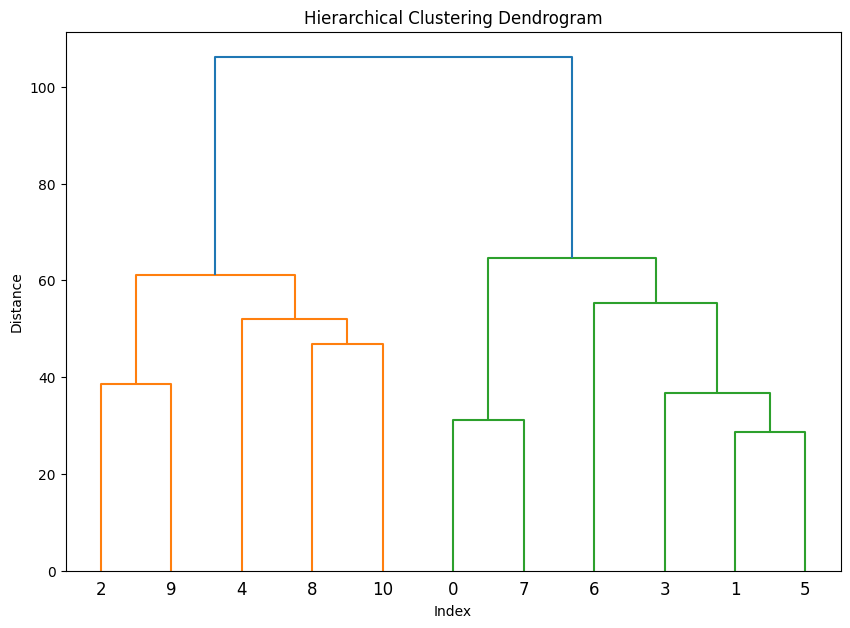

In [95]:
import scipy.cluster.hierarchy as sch

X_transposed = MD_x_new_encoded.T  # Transpose the data

# Standardize the data (optional but recommended for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transposed)

# Compute the distance matrix (Euclidean by default)
distance_matrix = sch.distance.pdist(X_scaled)

# Perform hierarchical clustering
linked = sch.linkage(distance_matrix, method='ward')  # 'ward' method minimizes variance within clusters

# Plot the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

C:\Users\Bhanu\AppData\Local\Temp\ipykernel_2644\3375504113.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ss.barplot(x=np.arange(len(MD_k4_reordered)), y=MD_k4_reordered, palette="coolwarm", ci=None)
C:\Users\Bhanu\AppData\Local\Temp\ipykernel_2644\3375504113.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ss.barplot(x=np.arange(len(MD_k4_reordered)), y=MD_k4_reordered, palette="coolwarm", ci=None)


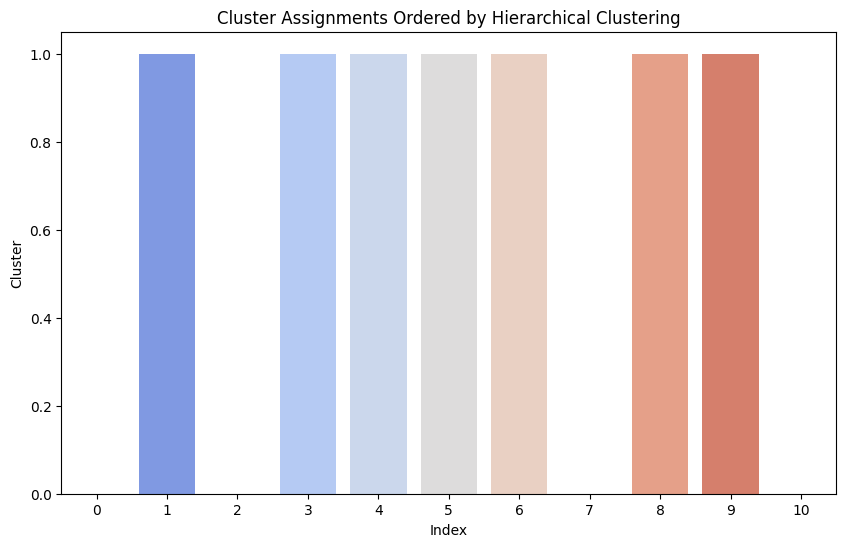

In [96]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

X_transposed = MD_x_new_encoded.T  # Transpose the data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transposed)

# Perform hierarchical clustering
distance_matrix = linkage(X_scaled, method='ward')

# Get the clustering order from the dendrogram
dendro = dendrogram(distance_matrix, no_plot=True)
clustering_order = dendro['leaves']  # This is the order of the rows (or observations)

MD_k4 = np.random.randint(0, 2, size=MD_x.shape[1])  # Example: random cluster assignment

# Reorder the cluster assignments based on the hierarchical clustering order
MD_k4_reordered = MD_k4[clustering_order]

# Create the bar chart with shaded colors (use seaborn's barplot)
plt.figure(figsize=(10, 6))
ss.barplot(x=np.arange(len(MD_k4_reordered)), y=MD_k4_reordered, palette="coolwarm", ci=None)

# Customize the plot
plt.title("Cluster Assignments Ordered by Hierarchical Clustering")
plt.xlabel("Index")
plt.ylabel("Cluster")
plt.show()

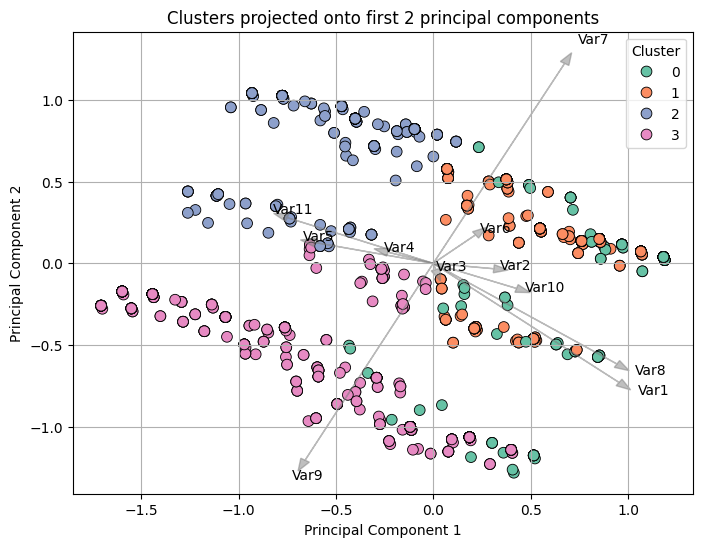

In [99]:
MD_x_T = MD_x_new_encoded.T

# Step 1: PCA projection
pca = PCA(n_components=2)
MD_pca_proj = pca.fit_transform(MD_x_T)

# Sanity check
MD_pca_proj = pca.fit_transform(X)
kmeans = KMeans(n_clusters=4, random_state=123)
MD_k4 = kmeans.fit_predict(X)
assert len(MD_pca_proj) == len(MD_k4)

# Step 2: Plot projected clusters
plt.figure(figsize=(8, 6))
ss.scatterplot(x=MD_pca_proj[:, 0], y=MD_pca_proj[:, 1],
                hue=MD_k4, palette='Set2', s=60, edgecolor='k')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clusters projected onto first 2 principal components")

# Optional: Draw original variable axes
for i, (comp1, comp2) in enumerate(pca.components_.T):
    plt.arrow(0, 0, comp1*2, comp2*2, color='gray', alpha=0.5, head_width=0.05)
    plt.text(comp1*2.2, comp2*2.2, f"Var{i+1}", color='black')

plt.grid(True)
plt.legend(title="Cluster")
plt.show()

## Describe segments

In [100]:
print(MD_x)

      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  Like  Age      VisitFrequency  Gender  \
0             1        0           0     6  

<Figure size 800x600 with 0 Axes>

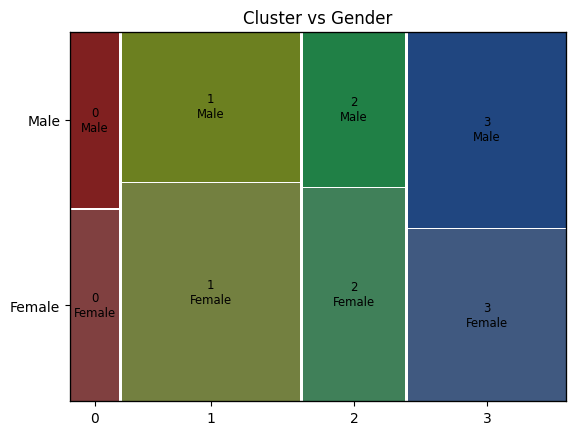

In [104]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
MD_k4_labels = kmeans.labels_
clusters=MD_k4_labels
gender = mcdonalds['Gender']
# Create a DataFrame if needed
df = pd.DataFrame({
    'Cluster': clusters,
    'Gender': gender
})

# Create a contingency table
table = pd.crosstab(df['Cluster'], df['Gender'])

# Convert table into a dict format for mosaic()
data_dict = {(str(row), str(col)): table.loc[row, col] 
             for row in table.index 
             for col in table.columns}

# Plot the mosaic plot
plt.figure(figsize=(8, 6))
mosaic(data_dict, title='Cluster vs Gender')
plt.show()

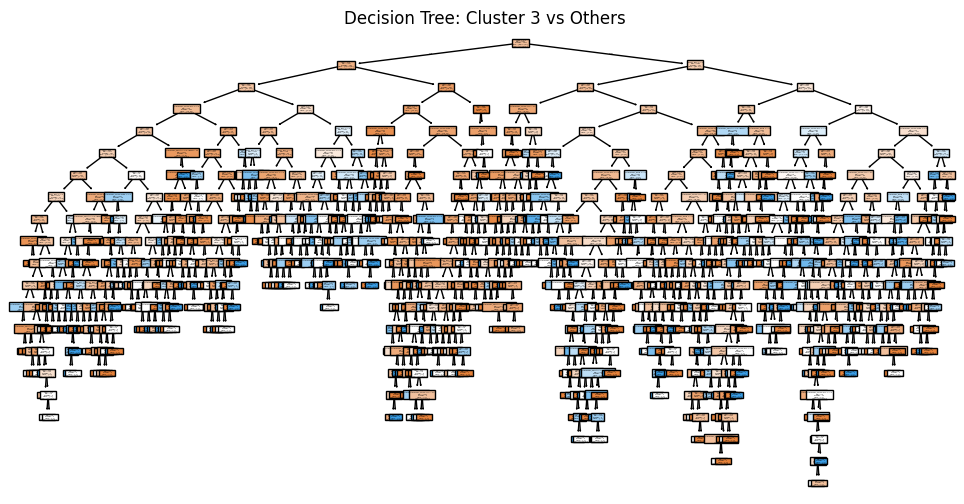

In [106]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Create binary target: 1 if in cluster 3, else 0
target = (MD_k4_labels == 3).astype(int)

# Step 2: Select predictor variables (make sure they're in your dataframe)
features = ['Like.n', 'Age', 'VisitFrequency', 'Gender']
X = mcdonalds[features]
y = target

# Step 3: Convert categorical features to numeric (if needed)
X = pd.get_dummies(X, drop_first=True)

# Step 4: Train the tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

# Step 5: Plot the tree
plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=X.columns, class_names=['Not Cluster 3', 'Cluster 3'], filled=True)
plt.title("Decision Tree: Cluster 3 vs Others")
plt.show()

In [107]:
mcdonalds['Cluster'] = MD_k4_labels

# Group by cluster and calculate mean of Like.n for each group
like = mcdonalds.groupby('Cluster')['Like.n'].mean()

print(like)

Cluster
0    3.555556
1    3.966667
2    6.978632
3    5.387978
Name: Like.n, dtype: float64
